In [13]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
dataV1= pd.read_csv("/Users/Jade/Desktop/common_companies.csv",encoding = "latin1")
dataV1.head()

,Unnamed: 0,ID,Birth Year,Gender Flag,Skillset1,Skillset1 Weight,Skillset2,Skillset2 Weight,City of profile,Country of profile,...,EducationFlag,DegreeType,EliteFlag,Dummy1,Dummy2,Dummy3,Dummy4,Layoff Date,Company Name,Employees Affected
0,0,808a3ae7-b1ec-31f0-9335-8f49e4e10a40,1988,0,Web Development,0.919146,Software Engineering,0.068156,Los Angeles,United States,...,False,NaN,False,NaN,NaN,BBG000BH2JM1,1.54E+12,2/1/2017,Symantec Corporation,87.0
1,0,1fe596b8-87d0-3118-ab5e-375485b477e9,1984,0,Mobile Telecommunications,0.571192,Business Development,0.260968,Mountain View,United States,...,False,NaN,False,NaN,NaN,BBG000C3J3C9,1.53E+12,7/22/2015,"Cisco Systems, Inc.",192.0
2,0,43d4f687-4de8-39e0-91f4-ed90ba1e2862,1967,2,Human Resources,0.264015,Human Resources,0.205493,San Francisco,United States,...,False,NaN,False,NaN,NaN,BBG000C3J3C9,1.54E+12,10/10/2014,"Cisco Systems, Inc.",1005.0
3,0,6870e27a-1eb0-3be6-8878-43b3adc611cc,1964,0,Web Design,0.428620,Digital Marketing,0.313889,San Jose,United States,...,False,NaN,False,NaN,NaN,BBG000BH2JM1,1.54E+12,6/10/2016,Symantec Corporation,15.0
4,0,8da0eaa5-8d1a-3360-986d-4ab1f5658930,1992,2,Software Engineering,0.704756,Web Development,0.284496,New York,United States,...,False,NaN,False,NaN,NaN,BBG000C3J3C9,1.54E+12,7/22/2015,"Cisco Systems, Inc.",192.0


In [2]:
# use one-hot encoding to encode skillsets
encodeSkill1 = pd.get_dummies(dataV1['Skillset1'], prefix = 's1', prefix_sep='-')
encodeSkill2 = pd.get_dummies(dataV1['Skillset2'], prefix = 's2', prefix_sep='-') 
dataV1 = dataV1.drop(['Skillset1','Skillset2'], axis = 1)
dataV1 = dataV1.join(encodeSkill1) 
dataV1 = dataV1.join(encodeSkill2)
dataV1.head()

,Unnamed: 0,ID,Birth Year,Gender Flag,Skillset1 Weight,Skillset2 Weight,City of profile,Country of profile,Education,Elite Institution,...,s2-Product Management,s2-Public Policy,s2-Real Estate,s2-Retail and Fashion,s2-Sales,s2-Social Media and Communications,s2-Software Engineering,s2-Video and Film Production,s2-Web Design,s2-Web Development
0,0,808a3ae7-b1ec-31f0-9335-8f49e4e10a40,1988,0,0.919146,0.068156,Los Angeles,United States,5,1,...,0,0,0,0,0,0,1,0,0,0
1,0,1fe596b8-87d0-3118-ab5e-375485b477e9,1984,0,0.571192,0.260968,Mountain View,United States,5,0,...,0,0,0,0,0,0,0,0,0,0
2,0,43d4f687-4de8-39e0-91f4-ed90ba1e2862,1967,2,0.264015,0.205493,San Francisco,United States,4,0,...,0,0,0,0,0,0,0,0,0,0
3,0,6870e27a-1eb0-3be6-8878-43b3adc611cc,1964,0,0.428620,0.313889,San Jose,United States,4,0,...,0,0,0,0,0,0,0,0,0,0
4,0,8da0eaa5-8d1a-3360-986d-4ab1f5658930,1992,2,0.704756,0.284496,New York,United States,4,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# drop useless columns
dataV1 = dataV1.drop(['Unnamed: 0','EducationFlag','EliteFlag','DegreeType','Dummy1','Dummy2','Dummy3','Dummy4'],axis = 1)

In [4]:
dataV1.columns

Index(['ID', 'Birth Year', 'Gender Flag', 'Skillset1 Weight',
       'Skillset2 Weight', 'City of profile', 'Country of profile',
       'Education', 'Elite Institution', 'Start Date', 'StartFlag', 'End Date',
       'EndFlag', 'CurrentEmployFlag', 'Length', 'Role', 'Dept', 'Company',
       'Company_Norm', 'Ticker', 'Exchange', 'PublicFlag', 'Location',
       'Industry', 'Layoff Date', 'Company Name', 'Employees Affected',
       's1-Administration', 's1-Business Development', 's1-Data Analysis',
       's1-Design', 's1-Digital Marketing', 's1-Electrical Engineering',
       's1-Energy, Oil, and Gas', 's1-Finance', 's1-Healthcare',
       's1-Hospitality', 's1-Human Resources', 's1-IT Management and Support',
       's1-Industrial Management', 's1-Insurance', 's1-Legal', 's1-Logistics',
       's1-Manufacturing and Process Management', 's1-Military',
       's1-Mobile Telecommunications', 's1-Musical Production',
       's1-Non-Profit and Community', 's1-Operations Management',
     

In [5]:
dataV1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 91 columns):
ID                                         8040 non-null object
Birth Year                                 8040 non-null object
Gender Flag                                8040 non-null int64
Skillset1 Weight                           8040 non-null float64
Skillset2 Weight                           8040 non-null float64
City of profile                            7307 non-null object
Country of profile                         8040 non-null object
Education                                  8040 non-null int64
Elite Institution                          8040 non-null int64
Start Date                                 8040 non-null object
StartFlag                                  8040 non-null bool
End Date                                   8040 non-null object
EndFlag                                    8040 non-null bool
CurrentEmployFlag                          8040 non-null bool
Leng

In [7]:
dataV1.isnull().sum()

ID                                            0
Birth Year                                    0
Gender Flag                                   0
Skillset1 Weight                              0
Skillset2 Weight                              0
City of profile                             733
Country of profile                            0
Education                                     0
Elite Institution                             0
Start Date                                    0
StartFlag                                     0
End Date                                      0
EndFlag                                       0
CurrentEmployFlag                             0
Length                                        0
Role                                          0
Dept                                       2568
Company                                       0
Company_Norm                                  0
Ticker                                       48
Exchange                                

In [10]:
# unique skill set
#dataV1['Skillset1'].unique()
#dataV1['Skillset2'].unique()

In [11]:
dataV1 = dataV1.dropna(subset=['Employees Affected'])

In [12]:
# Linear Regression Model
# response is the length
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
y = dataV1['Length']
X = dataV1.drop(['ID', 'Birth Year', 'Gender Flag',
       'City of profile', 'Country of profile',
       'Start Date', 'StartFlag', 'End Date',
       'EndFlag', 'CurrentEmployFlag', 'Length', 'Role', 'Dept', 'Company',
       'Company_Norm', 'Ticker', 'Exchange', 'PublicFlag', 'Location',
       'Industry', 'Layoff Date', 'Company Name'],axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
# regression coefficients
lm.coef_

array([ 5.56191545e+02,  6.07455510e+02, -4.44898497e+01,  2.52053353e+01,
        2.33904195e-01, -1.24347763e+02, -1.77826307e+02, -4.61828447e+02,
       -3.98497046e+02, -2.82019700e+02,  1.73519044e+02,  2.77331321e+03,
       -1.37406570e+02, -1.35998892e+02, -2.91385840e+02, -9.08306650e+01,
       -2.41840898e+01, -5.00865015e+02, -8.11135619e+02,  4.49591736e+02,
        4.48973354e+02,  9.26232082e+02, -4.17615390e+02,  6.73525115e+02,
       -6.32101031e+02, -5.67252569e+01,  1.39195681e+02,  1.21550045e-01,
        1.05840441e+03, -6.25516499e+02, -4.79164883e+02,  6.56963531e+01,
       -1.49008867e+02, -2.55887228e+01, -9.81054731e+01, -2.85600598e+02,
       -5.02819860e+02,  5.29429160e+01, -2.12188970e+02, -1.57389423e+02,
       -1.26853102e+02, -1.38717790e+02, -1.49611615e+02, -1.02132358e+02,
       -1.88083008e+01, -5.50264419e+01,  4.42215491e+02, -1.03489006e+00,
        1.44573560e+02,  2.54232667e+02, -2.46162811e+02,  4.65102964e+01,
        3.72978227e+02,  

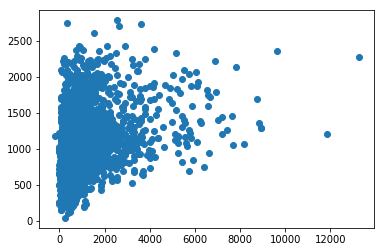

In [17]:
# Prediction on test data
predictions = lm.predict(X_test)
plt.scatter(y_test, predictions)

In [18]:
# variance score for the linear regression
lm.score(X_test,y_test)

0.10848883254451303

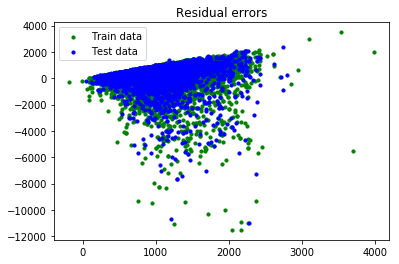

In [23]:
# plot residual errors in training data and test data
plt.scatter(lm.predict(X_train), lm.predict(X_train)-y_train, color = 'green', s=10, label = 'Train data')
plt.scatter(lm.predict(X_test), lm.predict(X_test)-y_test, color = 'blue', s=10, label = 'Test data')
plt.title("Residual errors")
plt.legend()